#### First make sure you have the required modules installed (`xarray`, `numpy`, `matplotlib`, `cmocean`, `cartopy`)
#### and you have the BlueMarble image (or another similar one) available

In [1]:
import os
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from cmocean import cm
import cartopy.crs as ccrs
img = plt.imread('/path/to/BlueMarble_TOPO_010_JAN.png')

We use Optimum Interpolation Sea Surface Temperature (OISST) v2.1 data provided by NOAA ([link](https://www.ncdc.noaa.gov/oisst/data-access)) for this example.  

The background image is taken from the NASA visible earth collection Blue Marble ([link](https://visibleearth.nasa.gov/collection/1484/blue-marble)) 

We use `xarray` to open the data for 01 Jan 2020. We can just provide the OPENDAP link to `xarray`.

In [2]:
ds = xr.open_dataset("https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/" 
                     + "202001/oisst-avhrr-v02r01.20200101.nc")

After the dataset is loaded, we can plot a nice image.  

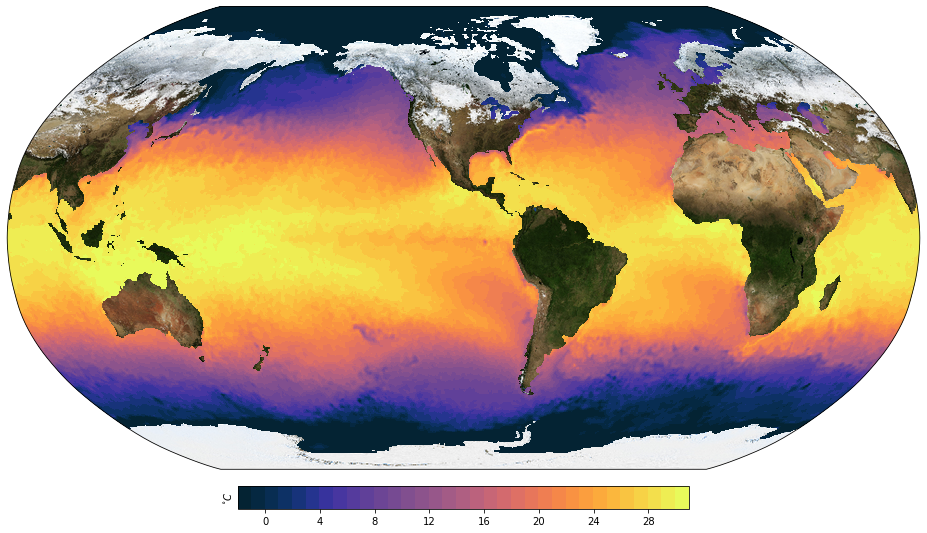

In [3]:
# First we make the size of the figure big 
# (depending on your notebook settings, you might need to adjust the values)
plt.figure(figsize=(16,8))
ax = plt.gca()

# Next, we define some levels for the colors we want to use in order to create a discrete (and not continuous)
# colormap
levs = np.arange(-2, 32, 1)
norm = colors.BoundaryNorm(boundaries=levs, ncolors=256)

# Now we tell pyplot which projection we want to use
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100.0))

# and display the background image in that projection
ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=500, zorder=1)
# increase `regrid_shape` for higher resolutoin background image

# Now we need to add the SST data
map1 = ax.pcolormesh(ds.lon, ds.lat, ds.sst.squeeze(), 
                    cmap=cm.thermal, norm=norm, transform=ccrs.PlateCarree(), zorder=2)
# Note that the `zorder` arguments are used to make sure, the SSt is displayed above the background image
# and the norm argument is used to tell pcolormesh to use the color-levels defined in `levs`

# Now we add a colorbar and make sure it is nicely positioned below the map and it has an appropriate label    
c = plt.colorbar(map1, pad=0.03, shrink=0.4, orientation='horizontal')
c.ax.set_ylabel('$^{\circ}C$')

# And finally, we get rid of all the excessive white space around the map
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)


The following is just a repetition of the map above, with a different projection

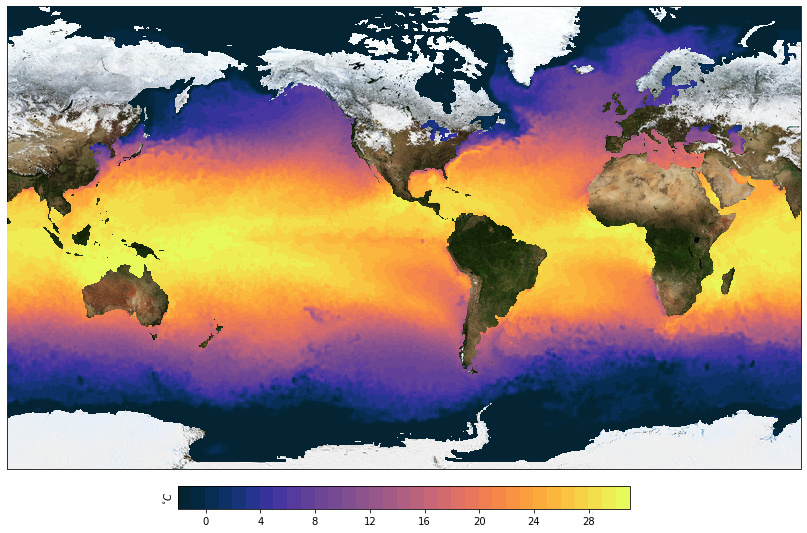

In [4]:
plt.figure(figsize=(16,8))
ax = plt.gca()
    
levs = np.arange(-2, 32, 1)
norm = colors.BoundaryNorm(boundaries=levs, ncolors=256)
    
ax = plt.axes(projection=ccrs.Miller(central_longitude=-100.0))
ax.set_extent([-180, 180, -80, 80], ccrs.PlateCarree())
# We limit the extend here to 76deg South to 76deg North because the Miller projection is not really designed
# to display the whole range of latitudes (Antarctica and the Arctic will be huge... try if you want!)

ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=500)

map1 = ax.pcolormesh(ds.lon, ds.lat, ds.sst.squeeze(), 
                    cmap=cm.thermal, norm=norm, transform=ccrs.PlateCarree(), zorder=3)
    
c = plt.colorbar(map1, pad=0.03, shrink=0.4, orientation='horizontal')
c.ax.set_ylabel('$^{\circ}C$')

plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)